<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn
!pip install numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2026-01-18 01:07:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  38.4MB/s    in 4.0s    

2026-01-18 01:07:54 (37.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


/tmp/ipykernel_1608/195855739.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['marker_size'] = plot_df['JobSatPoints_6'].clip(lower=1) * 10


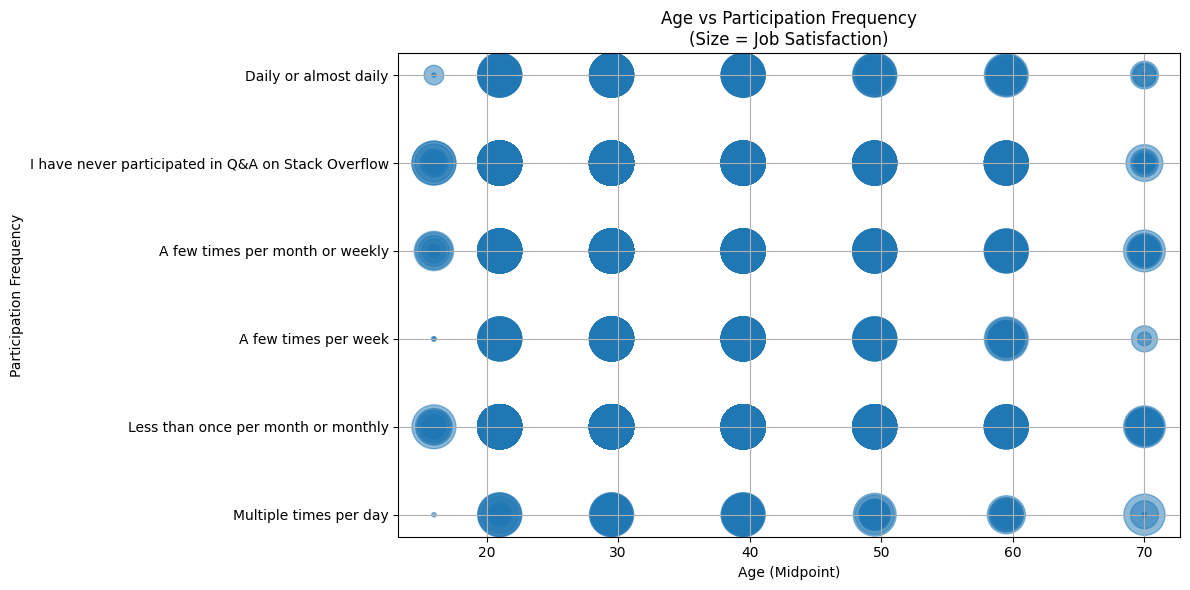

In [5]:
##Write your code here
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

df = df.copy()
df['Age_Numeric'] = df['Age'].map(age_map)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
plot_df = df.dropna(subset=['Age_Numeric', 'SOPartFreq', 'JobSatPoints_6'])
plot_df['marker_size'] = plot_df['JobSatPoints_6'].clip(lower=1) * 10

plt.figure(figsize=(12, 6))
plt.scatter(plot_df['Age_Numeric'], plot_df['SOPartFreq'],s=plot_df['marker_size'],alpha=0.5)
plt.title('Age vs Participation Frequency\n(Size = Job Satisfaction)')
plt.xlabel('Age (Midpoint)')
plt.ylabel('Participation Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


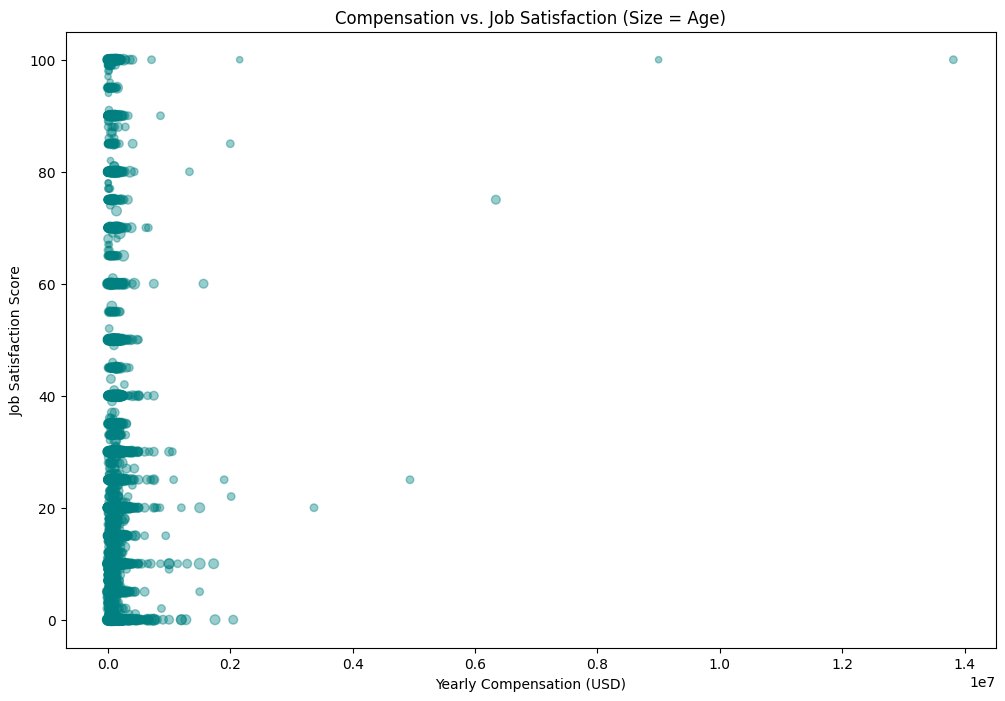

In [6]:
##Write your code here
plt.figure(figsize=(12, 8))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], s=df['Age_Numeric'], alpha=0.4, c='teal')
plt.title('Compensation vs. Job Satisfaction (Size = Age)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



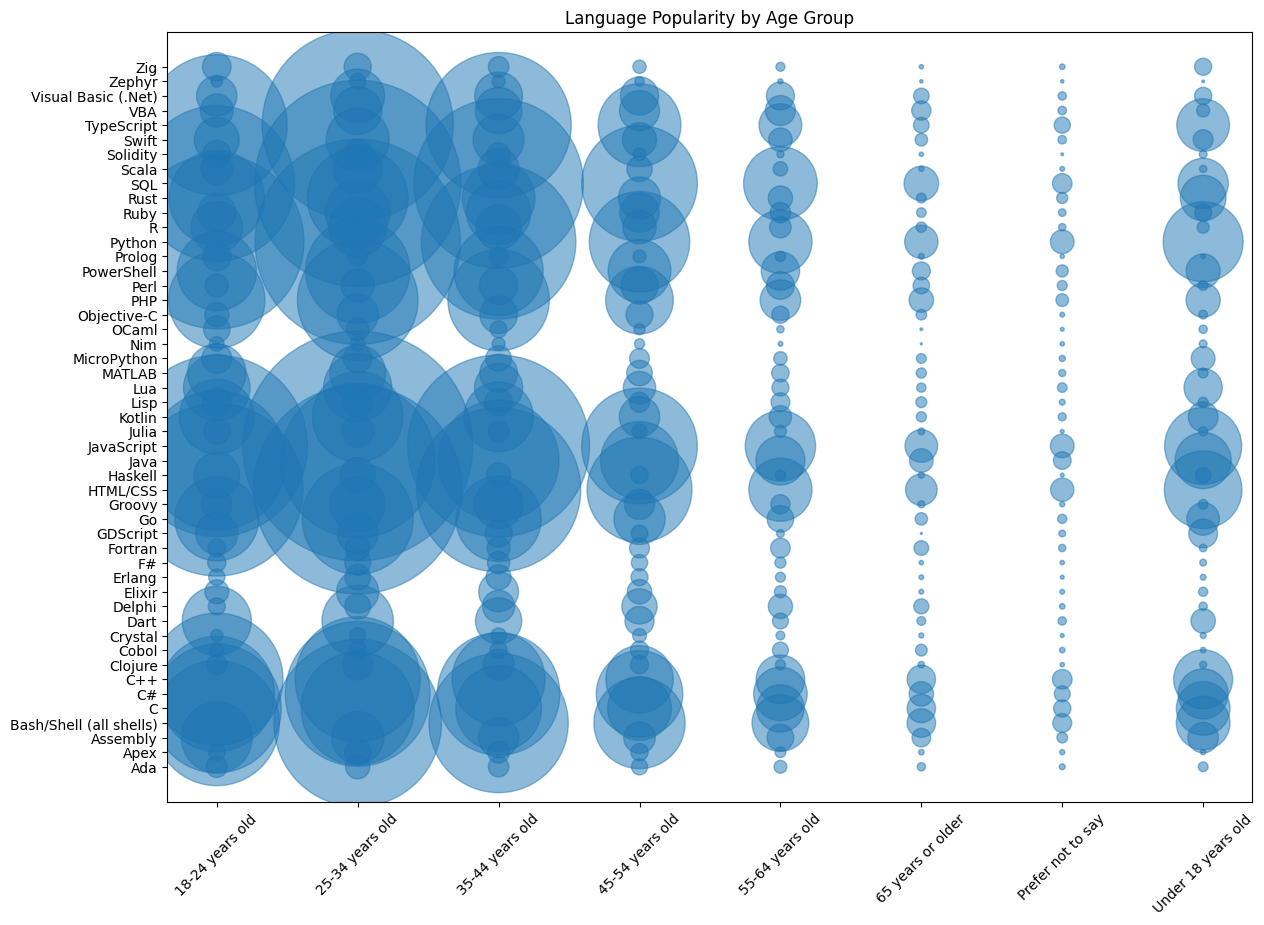

In [7]:
##Write your code here
df_tech = df[['Age', 'LanguageHaveWorkedWith']].dropna()
df_tech['Language'] = df_tech['LanguageHaveWorkedWith'].str.split(';')
df_tech = df_tech.explode('Language')

# Get counts per Age/Language pair
df_tech_counts = df_tech.groupby(['Age', 'Language']).size().reset_index(name='Count')

plt.figure(figsize=(14, 10))
plt.scatter(df_tech_counts['Age'], df_tech_counts['Language'], s=df_tech_counts['Count']*2, alpha=0.5)
plt.title('Language Popularity by Age Group')
plt.xticks(rotation=45)
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


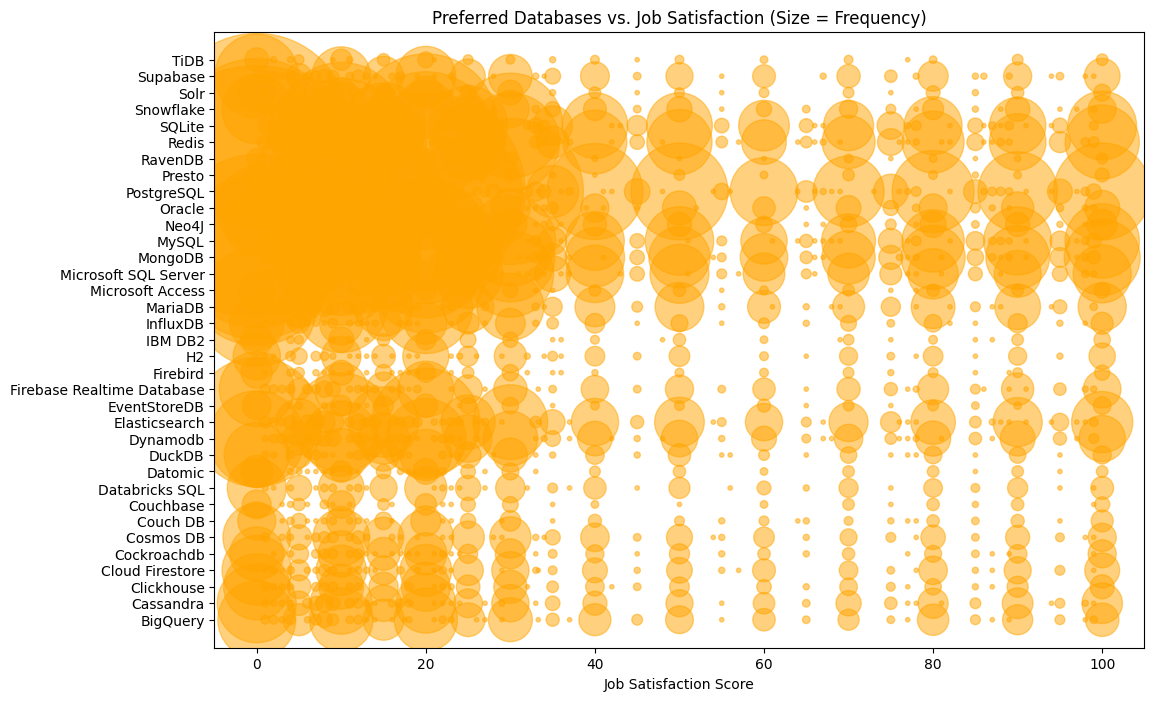

In [8]:
##Write your code here
df_db = df[['DatabaseWantToWorkWith', 'JobSatPoints_6']].dropna()
df_db['Database'] = df_db['DatabaseWantToWorkWith'].str.split(';')
df_db = df_db.explode('Database')

df_db_counts = df_db.groupby(['Database', 'JobSatPoints_6']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
plt.scatter(df_db_counts['JobSatPoints_6'], df_db_counts['Database'], s=df_db_counts['Count']*10, alpha=0.5, color='orange')
plt.title('Preferred Databases vs. Job Satisfaction (Size = Frequency)')
plt.xlabel('Job Satisfaction Score')
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


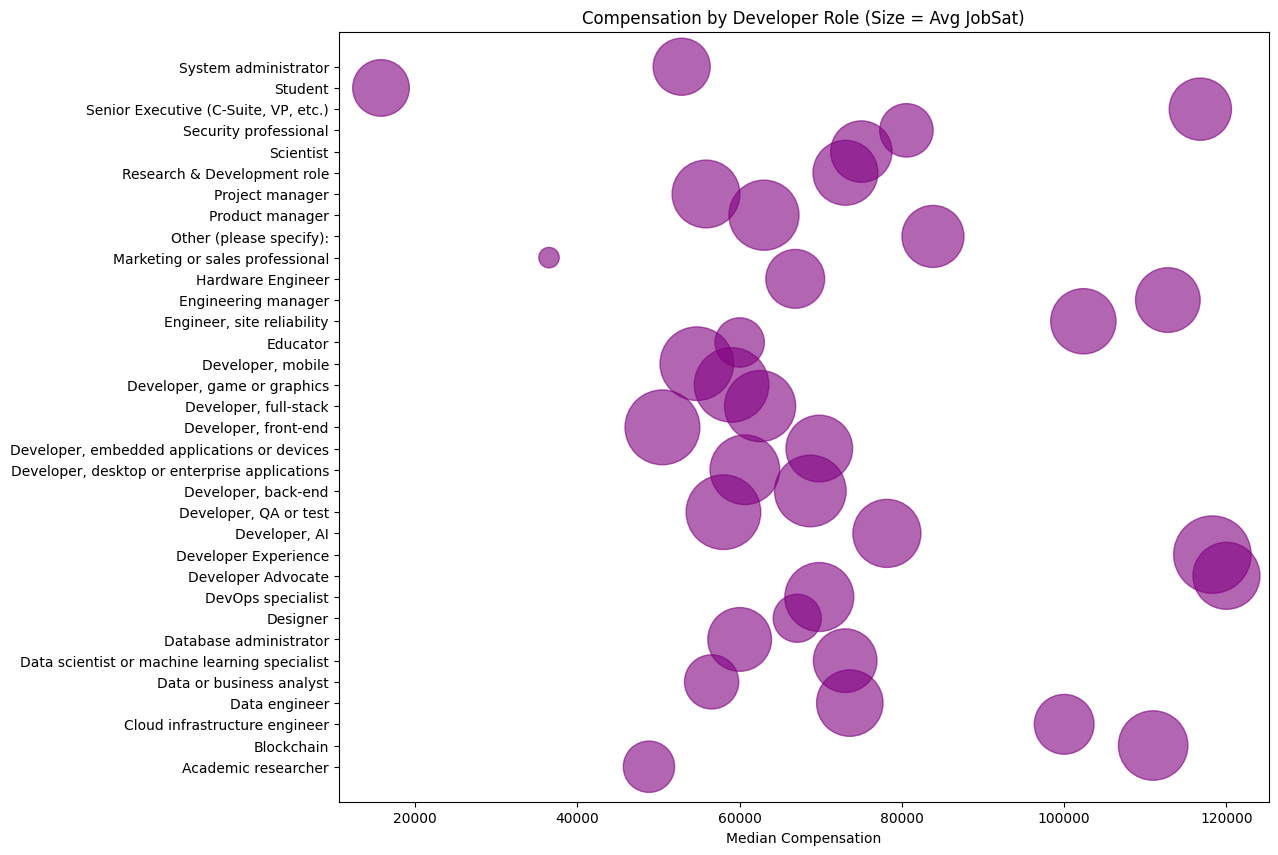

In [9]:
##Write your code here
df_roles = df[['DevType', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()
df_roles['Role'] = df_roles['DevType'].str.split(';')
df_roles = df_roles.explode('Role')

# Taking median for the visualization points
df_roles_viz = df_roles.groupby('Role').agg({'ConvertedCompYearly':'median', 'JobSatPoints_6':'mean'}).reset_index()

plt.figure(figsize=(12, 10))
plt.scatter(df_roles_viz['ConvertedCompYearly'], df_roles_viz['Role'], s=df_roles_viz['JobSatPoints_6']*100, alpha=0.6, c='purple')
plt.title('Compensation by Developer Role (Size = Avg JobSat)')
plt.xlabel('Median Compensation')
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


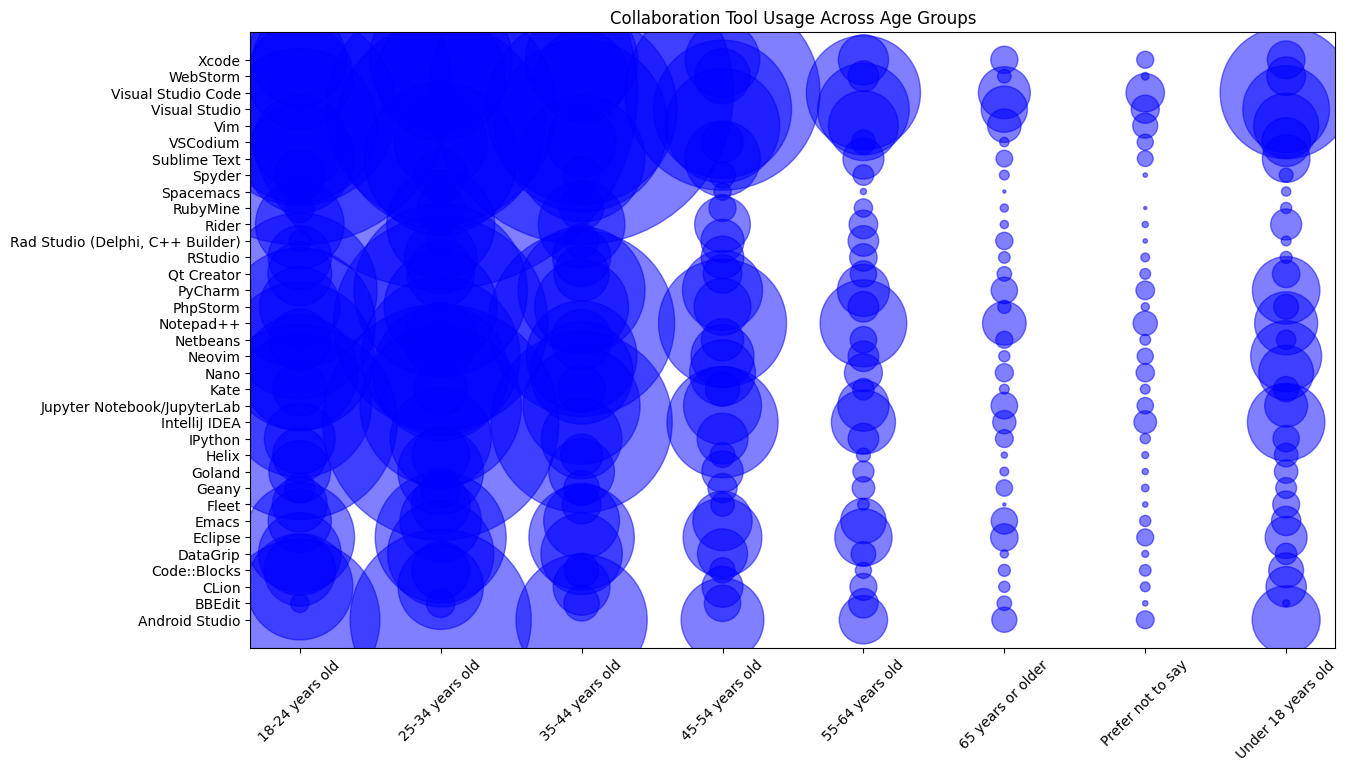

In [10]:
##Write your code here
df_tools = df[['Age', 'NEWCollabToolsHaveWorkedWith']].dropna()
df_tools['Tool'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tools = df_tools.explode('Tool')

df_tools_counts = df_tools.groupby(['Age', 'Tool']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
plt.scatter(df_tools_counts['Age'], df_tools_counts['Tool'], s=df_tools_counts['Count']*5, alpha=0.5, c='blue')
plt.title('Collaboration Tool Usage Across Age Groups')
plt.xticks(rotation=45)
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



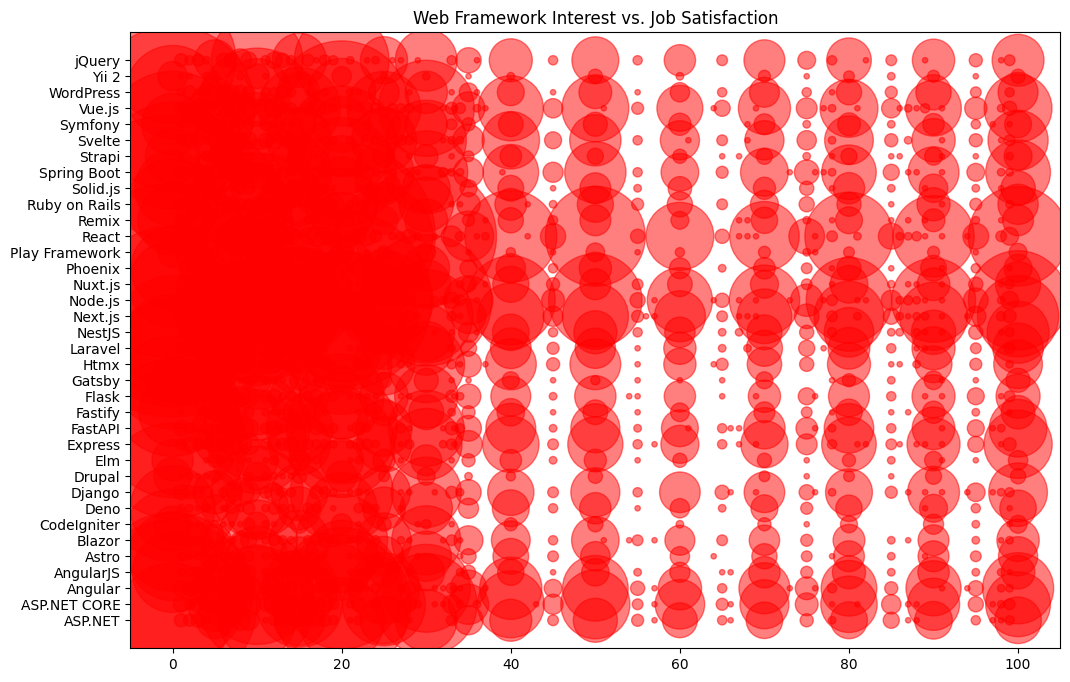

In [11]:
##Write your code here
df_web = df[['WebframeWantToWorkWith', 'JobSatPoints_6']].dropna()
df_web['Framework'] = df_web['WebframeWantToWorkWith'].str.split(';')
df_web = df_web.explode('Framework')

df_web_counts = df_web.groupby(['Framework', 'JobSatPoints_6']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
plt.scatter(df_web_counts['JobSatPoints_6'], df_web_counts['Framework'], s=df_web_counts['Count']*15, alpha=0.5, color='red')
plt.title('Web Framework Interest vs. Job Satisfaction')
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



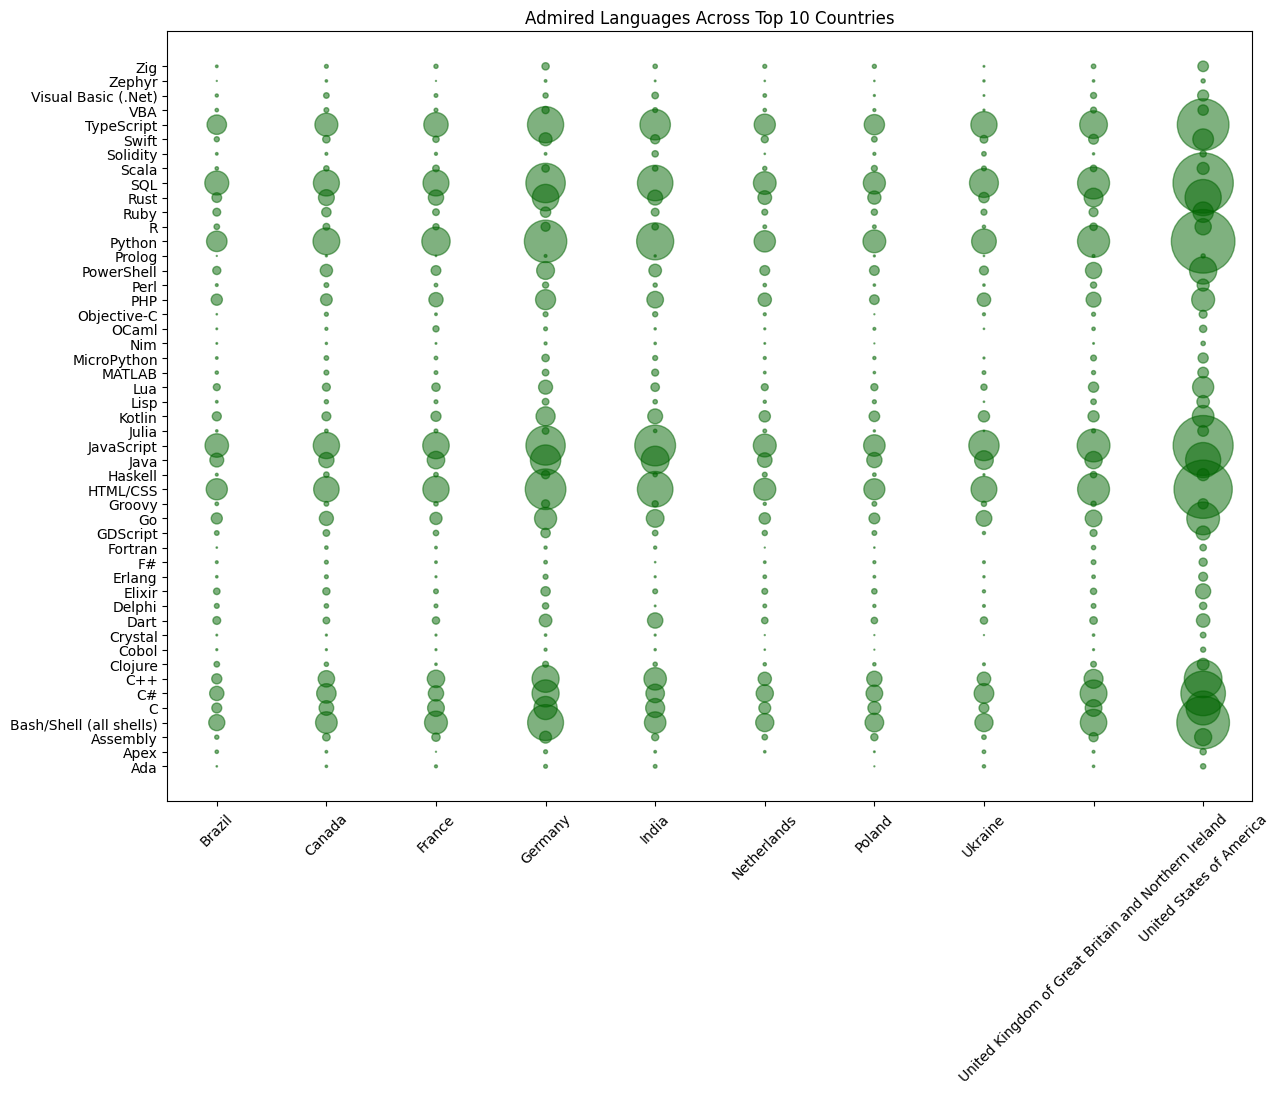

In [12]:
##Write your code here
top_10_countries = df['Country'].value_counts().nlargest(10).index
df_admired = df[df['Country'].isin(top_10_countries)][['Country', 'LanguageAdmired']].dropna()
df_admired['Language'] = df_admired['LanguageAdmired'].str.split(';')
df_admired = df_admired.explode('Language')

df_admired_counts = df_admired.groupby(['Country', 'Language']).size().reset_index(name='Frequency')

plt.figure(figsize=(14, 10))
plt.scatter(df_admired_counts['Country'], df_admired_counts['Language'], s=df_admired_counts['Frequency']/2, alpha=0.5, c='darkgreen')
plt.title('Admired Languages Across Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
